# WeatherPy
----

### Analysis
 - The smaller the latitiude the higher the max temp, there is a bowed trend to the data which makes sense because the earth is round
 - There does not appear to be clear correlation between latitude and humidity
 - Cloudiness also appears to be fairly equally banded, this is likely on account of the method of measurment
 - Even though the use of random selection there are more cities above the equator. This makes sense in regards to land mass and usabiliy of the land mass. 
---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
maxtemp = []
windspeed = []
cityname = []

# Loop through the list of cities and perform a request for data on each


for city in cities:
    try:
        response = requests.get(query_url + city).json()
        
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        windspeed.append(response['wind']['speed'])
        cityname.append(response['name'])
        print(city)
     
    except (KeyError, IndexError):
        print(f"{city} not found... skipping.")

    


iguape
atuona
thyboron
kodiak
kapaa
mendahara not found... skipping.
lavrentiya
nikolskoye
praia
hilo
bartica
tasiilaq
henties bay
bluff
vaitupu not found... skipping.
airai
west plains
punta arenas
ushuaia
salalah
strezhevoy
souillac
barrow
hermanus
peleduy
yulara
castro
bubaque
puerto ayora
mataura
whitefish
christchurch
east london
cravo norte
igunga
jamestown
geraldton
kamenka
quatre cocos
timizart
mayor pablo lagerenza
safwah not found... skipping.
cape town
aktash not found... skipping.
hit
hithadhoo
burica not found... skipping.
rikitea
dingle
ust-kuyga
mehran
albany
murwillumbah
vaini
merauke
dzhusaly not found... skipping.
khatanga
tommot
zhangye
walvis bay
san jose
chapais
qaanaaq
malanje
samalaeulu not found... skipping.
toamasina
avarua
arraial do cabo
bahawalnagar
poplar bluff
palabuhanratu not found... skipping.
gamba
tromso
thompson
okato
severo-kurilsk
batagay-alyta
nanortalik
ngunguru
flinders
leningradskiy
ambilobe
longlac not found... skipping.
constitucion
tumannyy 

In [4]:
print(f"City Name Count: {len(cityname)}")
print(f"Cloudiness Count: {len(cloudiness)}")
print(f"Country Count: {len(country)}")
print(f"Date: {len(date)}")
print(f"Humidity Count: {len(humidity)}")
print(f"Lat Count: {len(lat)}")
print(f"Long Count: {len(lng)}")
print(f"Max Temp Count: {len(maxtemp)}")
print(f"Wind Speed Count: {len(windspeed)}")




City Name Count: 545
Cloudiness Count: 545
Country Count: 545
Date: 545
Humidity Count: 545
Lat Count: 545
Long Count: 545
Max Temp Count: 545
Wind Speed Count: 545


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {    
    "City": cityname,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity, 
    "Lat": lat,
    "Lng": lng, 
    "Max Temp": maxtemp,
    "Wind Speed": windspeed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()


weather_data.to_csv(output_data_file, encoding='utf-8', index=False)
weather_data.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Iguape,24,BR,1553365277,94,-24.70,-47.56,79.87,6.98
1,Atuona,68,PF,1553365277,100,-9.80,-139.03,82.12,16.49
2,Thyboron,0,DK,1553365205,82,56.70,8.21,43.00,1.01
3,Kodiak,90,US,1553365104,29,39.95,-94.76,53.60,11.41
4,Kapaa,75,US,1553365093,73,22.08,-159.32,73.40,19.46
5,Lavrentiya,92,RU,1553365278,100,65.58,-170.99,14.17,10.00
6,Nikolskoye,90,RU,1553365236,86,59.70,30.79,37.99,8.95
7,Praia,75,BR,1553360400,57,-20.25,-43.81,80.60,8.05
8,Hilo,75,US,1553365102,77,19.71,-155.08,72.00,5.82
9,Bartica,75,GY,1553364000,46,6.41,-58.62,89.60,13.87


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

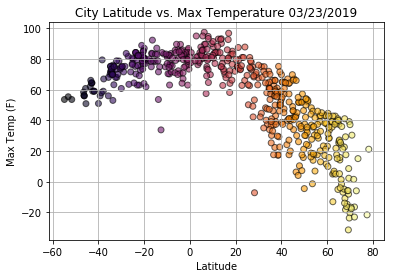

In [6]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", c = weather_data["Lat"], alpha=0.6, cmap='inferno', edgecolors='black')



# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature 03/23/2019")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(True)

# Save the figure
plt.savefig("LatvTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

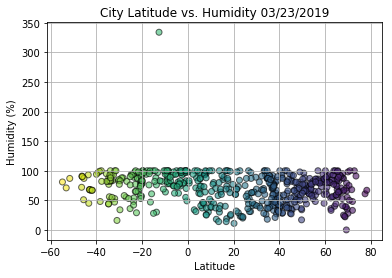

In [7]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", c = weather_data["Lat"], alpha=0.6, cmap='viridis_r', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity 03/23/2019")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("LatvHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

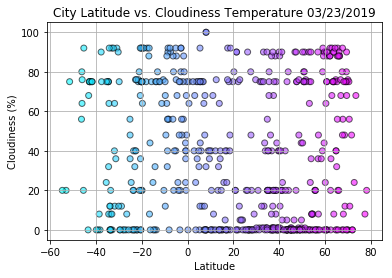

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", c = weather_data["Lat"], alpha=0.6, cmap='cool', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness Temperature 03/23/2019")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("LatvCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

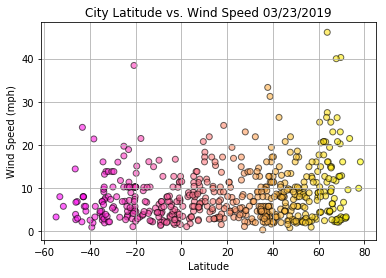

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", c = weather_data["Lat"], alpha=0.6, cmap='spring', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed 03/23/2019")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("LatvWindSpeed.png")

# Show plot
plt.show()